In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as mlt

In [2]:
image = cv.imread("images\download.jpg")
print(image)

[[[ 18  22  17]
  [ 18  22  17]
  [ 17  21  16]
  ...
  [  6   0   1]
  [  6   0   1]
  [  6   0   1]]

 [[ 18  22  17]
  [ 18  22  17]
  [ 17  21  16]
  ...
  [  6   0   1]
  [  6   0   1]
  [  6   0   1]]

 [[ 19  23  18]
  [ 18  22  17]
  [ 17  21  16]
  ...
  [  6   0   1]
  [  6   0   1]
  [  6   0   1]]

 ...

 [[206 223 232]
  [198 215 224]
  [198 215 224]
  ...
  [ 55  81  95]
  [ 42  69  83]
  [ 35  62  76]]

 [[199 216 225]
  [192 209 218]
  [191 208 217]
  ...
  [ 49  75  89]
  [ 35  62  76]
  [ 28  55  69]]

 [[193 210 219]
  [185 202 211]
  [185 202 211]
  ...
  [ 44  70  84]
  [ 31  58  72]
  [ 23  50  64]]]


In [3]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv.putText(img, label, (x-10,y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [9]:
image = cv.imread('images\download1.jpg')

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

classes = "yolo/yolo.txt"

with open(classes, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

net = cv.dnn.readNet("yolo/yolov3_custom_last.weights", 'yolo/yolov3_custom.cfg')

blob = cv.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)

outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.1
nms_threshold = 0.4
present_classes = []

for out in outs:
#     print(out)
    for detection in out:
#         print(detection)
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            print(center_x,center_y)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    present_classes.append(classes[class_ids[i]])
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

cv.imshow("object detection", image)
cv.waitKey()
    
cv.imwrite("object-detection.jpg", image)
cv.destroyAllWindows()
print(classes)
present_classes

153 36
152 38
['Narendra Modi', 'Barack Obama', 'Shahrukh khan', 'Cristiano Ronaldo']


['Shahrukh khan']

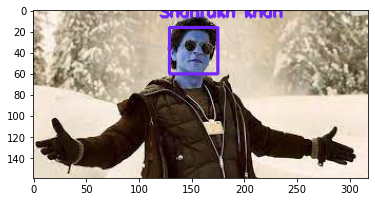

In [10]:
mlt.imshow(image)